In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

In [2]:
from utils import Dataset
from DataGeneration import SyntheticChangepointData

In [3]:
%load_ext autoreload
%autoreload 2

Notes:

- Способ проверять качество моделей: предположить модель генерации данных, затем как либо проверить, мол да, данные распределены таким образом. Затем нагенерить временных рядов с такой разладкой и на этом тестировать алгоритмы

- построить графиков
- отображать changepoint на графиках

In [3]:
data_path = 'data/'
files = [f'{data_path}Learning_data_part{i}.xlsx' for i in range(1,5)]

In [4]:
files

['data/Learning_data_part1.xlsx',
 'data/Learning_data_part2.xlsx',
 'data/Learning_data_part3.xlsx',
 'data/Learning_data_part4.xlsx']

In [5]:
df_list = []
for file in files:
    df_list.append(pd.read_excel(file))

In [8]:
df_list[0].columns

Index(['t', 'TS_0_coord_0', 'TS_1_coord_0', 'TS_2_coord_0', 'TS_3_coord_0',
       'TS_4_coord_0', 'TS_5_coord_0', 'TS_6_coord_0', 'TS_7_coord_0',
       'TS_8_coord_0', 'TS_9_coord_0', 'TS_10_coord_0', 'TS_11_coord_0',
       'TS_12_coord_0', 'TS_13_coord_0', 'TS_14_coord_0', 'TS_15_coord_0',
       'TS_16_coord_0', 'TS_17_coord_0', 'TS_18_coord_0', 'TS_19_coord_0',
       'TS_20_coord_0', 'TS_21_coord_0', 'TS_22_coord_0', 'TS_23_coord_0',
       'TS_24_coord_0', 'TS_25_coord_0', 'TS_26_coord_0', 'TS_27_coord_0',
       'TS_28_coord_0', 'TS_29_coord_0', 'TS_30_coord_0', 'TS_31_coord_0',
       'TS_32_coord_0', 'TS_33_coord_0', 'TS_34_coord_0', 'TS_35_coord_0',
       'TS_36_coord_0', 'TS_37_coord_0', 'TS_38_coord_0', 'TS_39_coord_0'],
      dtype='object')

In [9]:
df_list[1].columns

Index(['t', 'TS_0_coord_0', 'TS_1_coord_0', 'TS_2_coord_0', 'TS_3_coord_0',
       'TS_4_coord_0', 'TS_5_coord_0', 'TS_6_coord_0', 'TS_7_coord_0',
       'TS_8_coord_0', 'TS_9_coord_0', 'TS_10_coord_0', 'TS_11_coord_0',
       'TS_12_coord_0', 'TS_13_coord_0', 'TS_14_coord_0', 'TS_15_coord_0',
       'TS_16_coord_0', 'TS_17_coord_0', 'TS_18_coord_0', 'TS_19_coord_0',
       'TS_20_coord_0', 'TS_21_coord_0', 'TS_22_coord_0', 'TS_23_coord_0',
       'TS_24_coord_0', 'TS_25_coord_0', 'TS_26_coord_0', 'TS_27_coord_0',
       'TS_28_coord_0', 'TS_29_coord_0', 'TS_30_coord_0', 'TS_31_coord_0',
       'TS_32_coord_0', 'TS_33_coord_0', 'TS_34_coord_0', 'TS_35_coord_0',
       'TS_36_coord_0', 'TS_37_coord_0', 'TS_38_coord_0', 'TS_39_coord_0',
       'TS_40_coord_0', 'TS_41_coord_0', 'TS_42_coord_0', 'TS_43_coord_0',
       'TS_44_coord_0', 'TS_45_coord_0', 'TS_46_coord_0', 'TS_47_coord_0',
       'TS_48_coord_0', 'TS_49_coord_0', 'TS_50_coord_0', 'TS_51_coord_0',
       'TS_52_coord_0', 'TS_53

In [13]:
df_list[2].columns.to_list()

['t',
 'TS_0_coord_0',
 'TS_0_coord_1',
 'TS_1_coord_0',
 'TS_1_coord_1',
 'TS_2_coord_0',
 'TS_2_coord_1',
 'TS_3_coord_0',
 'TS_3_coord_1',
 'TS_4_coord_0',
 'TS_4_coord_1',
 'TS_5_coord_0',
 'TS_5_coord_1',
 'TS_6_coord_0',
 'TS_6_coord_1',
 'TS_7_coord_0',
 'TS_7_coord_1',
 'TS_8_coord_0',
 'TS_8_coord_1',
 'TS_9_coord_0',
 'TS_9_coord_1',
 'TS_10_coord_0',
 'TS_10_coord_1',
 'TS_11_coord_0',
 'TS_11_coord_1',
 'TS_12_coord_0',
 'TS_12_coord_1',
 'TS_13_coord_0',
 'TS_13_coord_1',
 'TS_14_coord_0',
 'TS_14_coord_1',
 'TS_15_coord_0',
 'TS_15_coord_1',
 'TS_16_coord_0',
 'TS_16_coord_1',
 'TS_17_coord_0',
 'TS_17_coord_1',
 'TS_18_coord_0',
 'TS_18_coord_1',
 'TS_19_coord_0',
 'TS_19_coord_1',
 'TS_20_coord_0',
 'TS_20_coord_1',
 'TS_21_coord_0',
 'TS_21_coord_1',
 'TS_22_coord_0',
 'TS_22_coord_1',
 'TS_23_coord_0',
 'TS_23_coord_1',
 'TS_24_coord_0',
 'TS_24_coord_1',
 'TS_25_coord_0',
 'TS_25_coord_1',
 'TS_26_coord_0',
 'TS_26_coord_1',
 'TS_27_coord_0',
 'TS_27_coord_1',
 'TS_2

In [57]:
df_list[3]

,t,TS_0_coord_0,TS_1_coord_0,TS_2_coord_0,TS_3_coord_0,TS_4_coord_0,TS_5_coord_0,TS_6_coord_0,TS_7_coord_0,TS_8_coord_0,...,TS_40_coord_0,TS_41_coord_0,TS_42_coord_0,TS_43_coord_0,TS_44_coord_0,TS_45_coord_0,TS_46_coord_0,TS_47_coord_0,TS_48_coord_0,TS_49_coord_0
0,0,777.679135,775.145167,779.134803,779.940318,778.026363,784.622101,777.189396,778.252745,779.079468,...,775.990131,776.544929,776.696670,775.502863,776.034399,779.124277,777.858835,772.493946,778.113188,781.139186
1,1,779.076261,776.546210,780.442133,780.675965,778.302130,784.288637,774.031459,777.958838,781.238591,...,775.690355,773.840369,775.158277,774.798338,774.527669,777.952551,782.555171,770.814566,777.173844,778.506020
2,2,780.463918,775.767970,778.328203,781.329404,777.655196,782.342678,775.171302,775.624617,779.597472,...,774.725358,774.788737,774.909912,776.028946,771.967426,774.937712,779.778453,773.937792,780.127145,774.693991
3,3,782.062161,774.817450,776.905897,779.395448,779.148350,782.584709,776.801345,776.009990,775.829146,...,781.270483,779.648506,776.739583,780.195431,774.619803,772.972471,783.537241,783.998422,776.423327,775.014931
4,4,781.943353,773.993488,775.856078,780.920122,780.324752,779.923217,777.294185,777.868083,775.931112,...,777.138367,772.004398,775.589954,780.118568,776.197269,774.892835,775.814396,780.589314,773.671797,774.153026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,780.581054,776.913516,775.485205,779.032343,774.314101,778.389016,773.969398,774.354056,770.632472,...,779.960999,776.074337,776.633718,775.573491,778.179804,767.931203,779.863447,775.439097,782.849531,778.622711
9996,9996,773.434447,776.026375,778.585924,775.001142,779.726733,776.295431,778.710655,781.840976,783.507821,...,778.351177,778.317111,778.900552,778.648416,773.934452,776.485556,775.393858,776.727005,771.973756,775.300026
9997,9997,781.461272,778.159755,773.667568,778.218570,775.151058,779.299580,776.736347,785.372351,770.508840,...,779.575579,778.060190,770.793968,774.717185,777.539988,779.765088,781.699775,777.018759,780.423606,771.525072
9998,9998,770.671198,775.089506,779.538293,778.376352,779.157803,773.743584,776.293337,771.189500,783.178285,...,773.604204,774.399717,780.612008,773.162370,775.986606,775.691275,775.750103,778.295713,783.163129,779.658544


есть одномерные, есть двумерные ряды

In [10]:
ts = df_list[3]['t'].to_numpy()
(ts - np.arange(0, len(ts), 1)).sum()

0

разрывов в данных нету

In [16]:
df = df_list[2]

column_titles = df.columns.to_list()[1:]


In [49]:
arr = df[['TS_0_coord_1']].to_numpy()

In [24]:
def extract_names(df: pd.DataFrame) -> dict[list]:
    columns = {}
    prev_series_number = -1
    for column in df.columns[1:]:
        parts = column.split('_')
        series_number = int(parts[1])
        coord_number = int(parts[3])
        if series_number == prev_series_number:
            columns[series_number].append(column)
        else:
            columns[series_number] = [column]
        prev_series_number = series_number
        

    return list(columns.values())



In [85]:
data = Dataset(1)

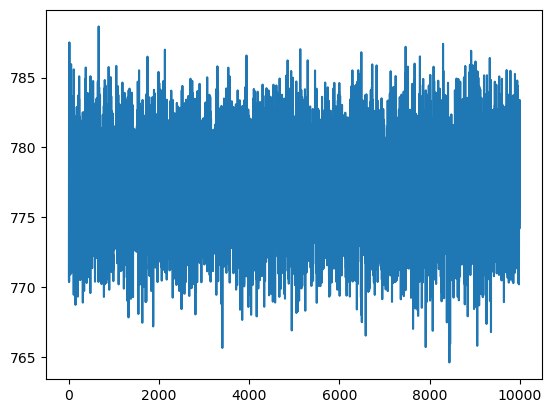

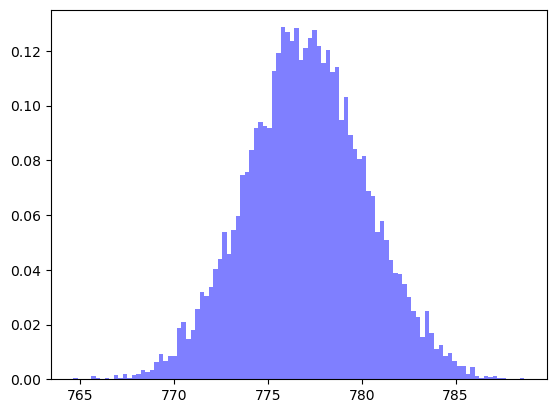

In [96]:
data.sample_plots(35)

In [101]:
data = Dataset(4)

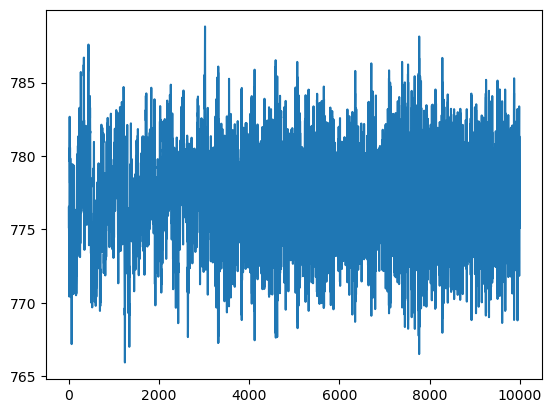

Matrix of p-values for the hypothesis that pairs of segments have the same distribution:
[[0.00000000e+00 9.18569009e-03 4.05406459e-01 9.68520061e-02]
 [9.18569009e-03 0.00000000e+00 1.18905246e-01 1.65347578e-05]
 [4.05406459e-01 1.18905246e-01 0.00000000e+00 3.48714287e-03]
 [9.68520061e-02 1.65347578e-05 3.48714287e-03 0.00000000e+00]]


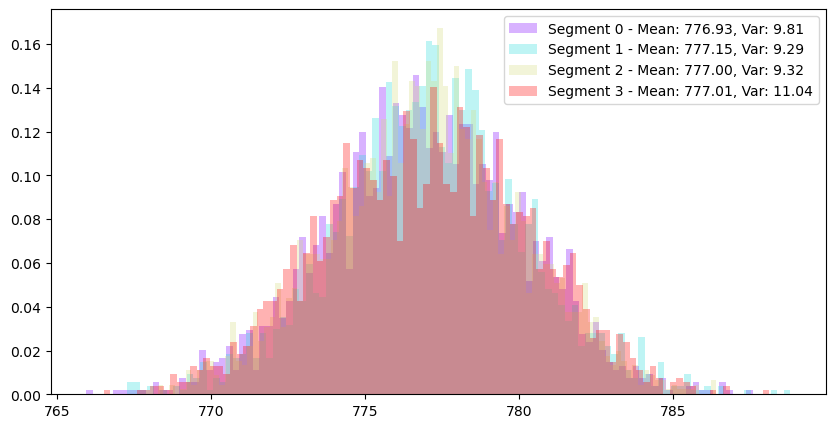

In [107]:
data.sample_plots(1, changepoints=[2500, 5000, 7500])

In [60]:
test_ts = data[0]

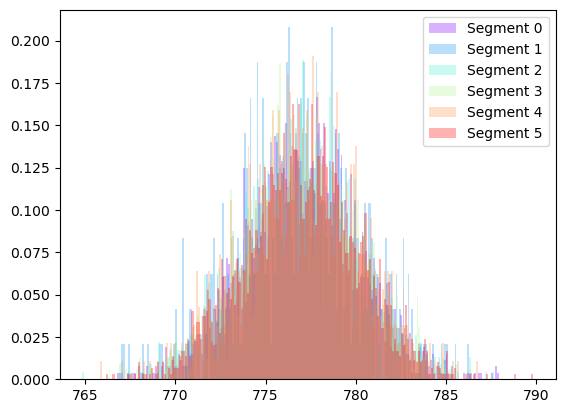

In [83]:
test_ts.plot_distribution(changepoints=[2500, 3000, 5000 , 6600, 7500], bins=200)

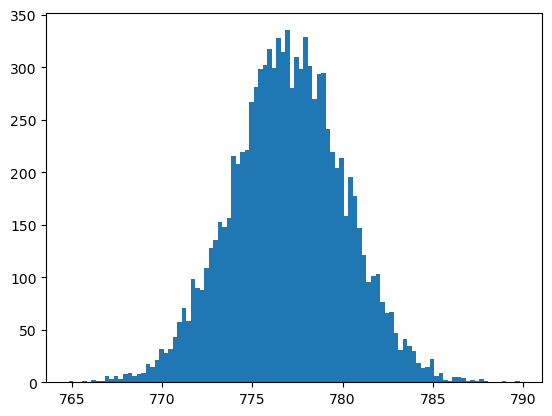

In [73]:
plt.hist(test_ts.ts, bins=100)

plt.show()

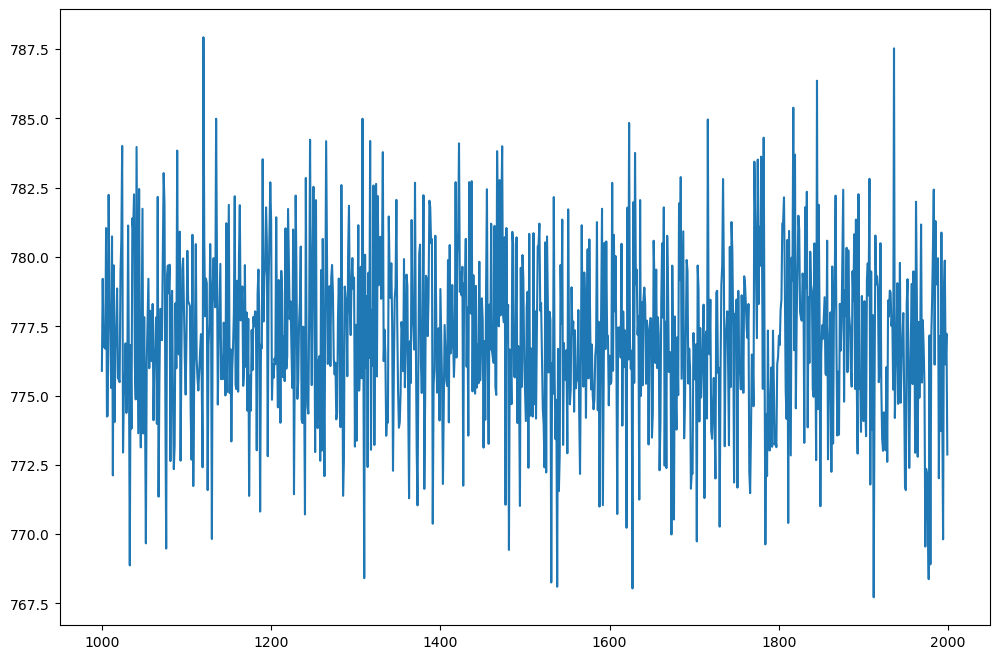

In [108]:
plt.figure(figsize=(12, 8))

test_ts.plot([1000, 2000])

In [54]:
for ts in data:
    print(ts)


        Dataser number: 1
        TS number: 0
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 1
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 2
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 3
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 4
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 5
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 6
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 7
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 8
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 9
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
   

In [7]:
[0][-1]

0

In [37]:
timespan = 1000
lambda_param = 1/500
changepoint_prior = expon(scale=1/lambda_param)
params_prior = [norm(loc=0, scale=10), norm(loc=30, scale=15) ]

def ts_gen_distribution(mean, std_dev, size):
    return norm(loc=mean, scale=std_dev).rvs(size=size).reshape(-1,1)

synthetic_data_generator = SyntheticChangepointData(changepoint_prior, params_prior, ts_gen_distribution, timespan)
time_series_data = synthetic_data_generator.generate_data()

print("Generated synthetic time series data of length", len(time_series_data))

Generated segments : [0, 81, 312, 653, 1000]
(81, 1)
(312, 1)
(653, 1)
(1000, 1)
Generated synthetic time series data of length 1000


In [39]:
time_series_data


        Dataser number: Synthetic
        TS number: None
        TS len: 1000
        TS dim: 1
        True cps: [81, 312, 653]

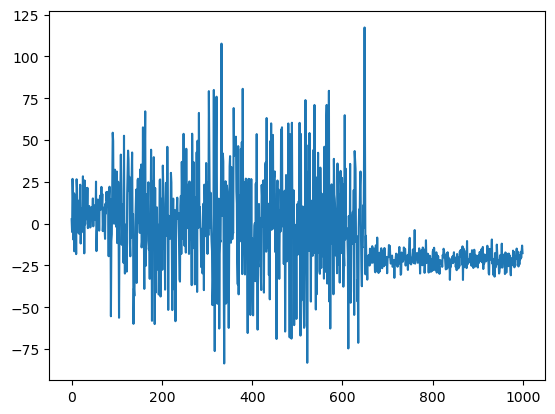

In [38]:
time_series_data.plot()